## 01_연습

In [1]:
# Python ≥3.5 이상이 권장됩니다
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 이상이 권장됩니다
import sklearn
assert sklearn.__version__ >= "0.20"

이 함수는 OECD의 삶의 만족도(life satisfaction) 데이터와 IMF의 1인당 GDP(GDP per capita) 데이터를 합칩니다. 이는 번거로운 작업이고 머신러닝과는 관계가 없기 때문에 책 안에 포함시키지 않았습니다.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

---

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [7]:
!ls

01_the_machine_learning_landscape.ipynb
01_연습.ipynb
02_end_to_end_machine_learning_project.ipynb
03_classification.ipynb
04_training_linear_models.ipynb
05_support_vector_machines.ipynb
06_decision_trees.ipynb
07_ensemble_learning_and_random_forests.ipynb
08_dimensionality_reduction.ipynb
09_unsupervised_learning.ipynb
10_neural_nets_with_keras.ipynb
11_training_deep_neural_networks.ipynb
12_custom_models_and_training_with_tensorflow.ipynb
13_loading_and_preprocessing_data.ipynb
14_deep_computer_vision_with_cnns.ipynb
15_processing_sequences_using_rnns_and_cnns.ipynb
16_nlp_with_rnns_and_attention.ipynb
17_autoencoders_and_gans.ipynb
18_reinforcement_learning.ipynb
19_training_and_deploying_at_scale.ipynb
INSTALL.md
LICENSE
README.md
apt.txt
book_equations.ipynb
book_equations.pdf
changes_in_2nd_edition.md
cover.png
custom_model_in_keras.ipynb
datasets
docker
environment.yml
extra_autodiff.ipynb
extra_gradient_descent_comparison.ipynb
images
index.ipynb
math_differential_calculus.ipynb

In [20]:
import os
# datapath = os.path.join("datasets", "lifesat", "")
datapath = os.path.join("/Users/anmunju/Documents/ML/handson-ml2/datasets/lifesat/")

In [21]:
# data_path = "./datasets/lifesat/"
oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')

In [23]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [30]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [31]:
gdp_per_capita.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0


In [32]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [34]:
country_stats.head(3)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


In [35]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

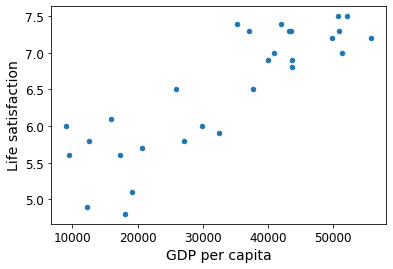

In [39]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [40]:
model = sklearn.linear_model.LinearRegression()

In [41]:
model.fit(X, y)

LinearRegression()

### 선형 회귀식으로 추정

In [42]:
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]


### k-최근접 이웃으로 추정

In [44]:
import sklearn.neighbors
model2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model2.fit(X, y)
X_new = [[22587]]
print(model2.predict(X_new))

[[5.76666667]]
